In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

In [4]:
data_train = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv')
data_train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_train.shape

(891, 13)

In [7]:
data_train.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This is our dataset description and its looking fine, Now let's just find the null values present in our dataset.

In [8]:
data_train.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Found null values in Age, Cabin, Embarked columns.

In [9]:
data_train['Age'] = data_train['Age'].fillna(data_train['Age'].median())
data_train['Embarked'] = data_train['Embarked'].fillna(data_train['Embarked'].mode()[0])

In [10]:
data_train.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Filled all the missing values using fillna and with the help of median() and mode(). And I am not filling the missing values in cabin as we are going to drop the cabin column.

In [11]:
data_train = data_train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data_train.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S


Dropped all the unwanted columns.

In [12]:
data_train.shape

(891, 9)

Now, the shape of the dataset is (891,8)

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   Sex         891 non-null    object 
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked    891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


There are still problem in our dataset as there is also object value present in dataset, which is going to create a problem for the machine as it accepts only int/float values.

In [14]:
lab = LabelEncoder()
sex = lab.fit_transform(data_train['Sex'])
embarked = lab.fit_transform(data_train['Embarked'])

In [15]:
data_train['Sex'] = sex
data_train['Embarked'] = embarked

In [16]:
data_train.head()

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.0,1,0,7.2500,2
1,1,1,1,0,38.0,1,0,71.2833,0
2,2,1,3,0,26.0,0,0,7.9250,2
3,3,1,1,0,35.0,1,0,53.1000,2
4,4,0,3,1,35.0,0,0,8.0500,2


* Encoded all the object data to integer data using LabelEncoder()


Lets, check it again.

In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   Survived    891 non-null    int64  
 2   Pclass      891 non-null    int64  
 3   Sex         891 non-null    int64  
 4   Age         891 non-null    float64
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Fare        891 non-null    float64
 8   Embarked    891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


Encoded all the object values.

# Now our dataset is clean and ready for further process

Checking the balance of the dataset based on our label i.e. Survived

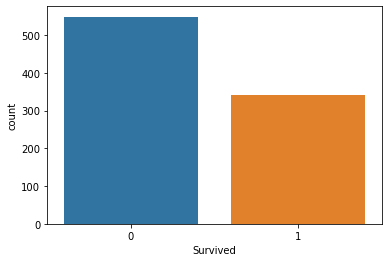

In [18]:
sns.countplot(x = 'Survived', data = data_train)
plt.show()

It is clear that the dataset is Balanced based on label

Now, checking the multicollinearity using heatplot map

In [19]:
data_corr = data_train.corr()

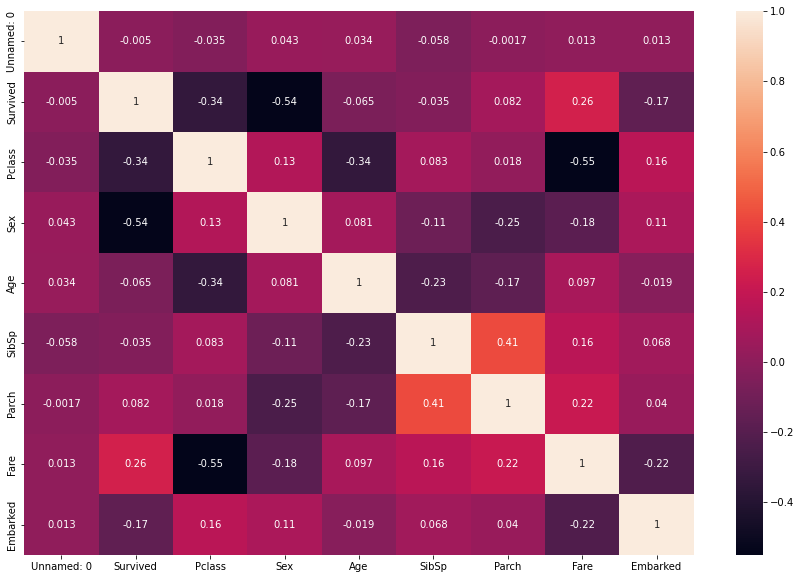

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(data_corr,annot = True)
plt.show()

There is no multocollinearity between columns

* Seperating the label and features

In [21]:
x_feature = data_train.drop(columns = ['Survived'])
x_label = data_train['Survived']

Now, using the StandardScaler() on the Features

In [22]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_feature)
x_scaled

array([[-1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.72622007, -1.56610693, -1.35557354, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [-1.72233219,  0.82737724, -1.35557354, ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 1.72233219,  0.82737724, -1.35557354, ...,  2.00893337,
        -0.17626324,  0.58595414],
       [ 1.72622007, -1.56610693,  0.73769513, ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 1.73010796,  0.82737724,  0.73769513, ..., -0.47367361,
        -0.49237783, -0.67817453]])

# - Training the model

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x_feature, x_label, test_size = 0.25, random_state = 9)

* Selecting the best Model for our dataset

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [25]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

*Defining all the models*

In [26]:
lr.fit(x_train,y_train)
kn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

print("ALL MODELS ARE TRAINED")

ALL MODELS ARE TRAINED


In [27]:
print('Logistic Regression Score : ',lr.score(x_train,y_train))
print('KNearest Neighbor Score : ',kn.score(x_train,y_train))
print('Decision Tree Score : ',dt.score(x_train,y_train))
print('Random Forest Score : ',rf.score(x_train,y_train))

Logistic Regression Score :  0.8083832335329342
KNearest Neighbor Score :  0.7589820359281437
Decision Tree Score :  1.0
Random Forest Score :  1.0


***This is the score of particular model on training***

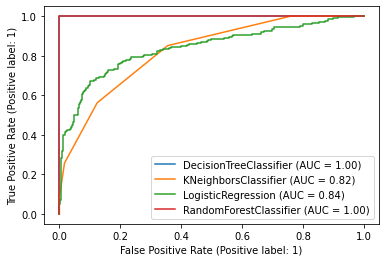

In [28]:
disp = plot_roc_curve(dt, x_train, y_train)
plot_roc_curve(kn,x_train,y_train, ax = disp.ax_)
plot_roc_curve(lr,x_train,y_train, ax = disp.ax_)
plot_roc_curve(rf,x_train,y_train, ax = disp.ax_)
plt.legend(prop = {'size': 10}, loc = 'lower right')
plt.show()

*On training this is the score for particular model and we find that Decision Tree and Random Forest is giving best score based on training data.*

In [29]:
print('Logistic Regression Score : ',lr.score(x_test,y_test))
print('KNearest Neighbor Score : ',kn.score(x_test,y_test))
print('Decision Tree Score : ',dt.score(x_test,y_test))
print('Random Forest Score : ',rf.score(x_test,y_test))

Logistic Regression Score :  0.7668161434977578
KNearest Neighbor Score :  0.6143497757847534
Decision Tree Score :  0.7668161434977578
Random Forest Score :  0.8026905829596412


***This is the score of particular model on testing***

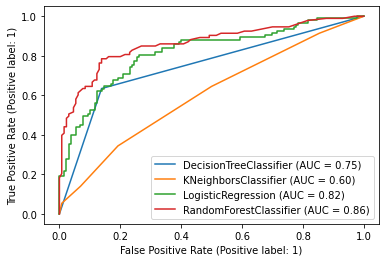

In [30]:
disp = plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(kn,x_test,y_test, ax = disp.ax_)
plot_roc_curve(lr,x_test,y_test, ax = disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax = disp.ax_)
plt.legend(prop = {'size': 10}, loc = 'lower right')
plt.show()

*On testing score, it is clear that  Random Forest and Logistic Regression score is the top 2 score among all. And can see the difference in decision tree score of testing and training.*

**- Model Instantiating & Trainning**

In [31]:
#rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

Random Forest Classifier model is Instantiated

In [32]:
y_pred = rf.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0])

Prediction using Random Forest Classifier

* Now, Creating a confusion matrix

In [33]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[117,  13],
       [ 35,  58]])

1. False Positive : 18
2. False Negative : 29

In [34]:
print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       130
           1       0.82      0.62      0.71        93

    accuracy                           0.78       223
   macro avg       0.79      0.76      0.77       223
weighted avg       0.79      0.78      0.78       223



**So, This is the Classification Report and according to this the accuracy of our model is 79%**